In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_excel('/content/gdrive/MyDrive/StudyData/MWCNT.xlsx')
df.head()

,N,L,D,R,P
0,1,3.0,25,86604.172966,0.099506
1,3,3.2,76,338.950223,0.001079
2,2,2.5,66,137.035578,0.000532
3,2,2.7,100,137.035578,0.000326
4,1,3.2,30,1073.375982,0.001395


In [ ]:
df.describe()

,N,L,D,R,P
count,26.000000,26.000000,26.000000,26.000000,26.000000
mean,3.653846,3.207692,73.192308,3552.945916,0.004603
std,2.365457,0.578220,30.032009,16940.694452,0.019365
min,1.000000,2.500000,25.000000,49.113233,0.000122
25%,2.000000,2.825000,51.000000,57.178287,0.000419
50%,2.500000,3.150000,66.500000,205.178969,0.000499
75%,5.750000,3.275000,95.250000,297.641889,0.001381
max,10.000000,5.000000,135.000000,86604.172966,0.099506


In [ ]:
df = df.drop([0])

In [ ]:
columns = ['N', 'L', 'D', 'R']

In [ ]:
from sklearn.model_selection import train_test_split

dfX = df.drop(['P'],axis=1)
dfY = df['P']
X_train, X_test, Y_train, Y_test = train_test_split(dfX, dfY, test_size=0.3, 
                                                    random_state=1)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RFModel = RandomForestRegressor()
RFParameters = {'n_estimators':[50,100,150],
                'max_depth':[3,5,10,None],
                'min_samples_split':[2,3,4],
                'min_samples_leaf':[1,2,3],
                'max_features':[1,3,5,7, "auto"]}

gridRF = GridSearchCV(estimator=RFModel, param_grid = RFParameters,
                      n_jobs = -1, error_score='raise')
gridRF.fit(X_train, Y_train)
print('Best hyperparameters are: '+str(gridRF.best_params_))
bestRF = gridRF.best_estimator_
score = bestRF.score(X_test, Y_test)
print('R^2 score: '+str(score))
y_pred_linear_model = bestRF.predict(X_test)
print('MSE:',(mean_squared_error(Y_test,y_pred_linear_model)))
print('MAE:',(mean_absolute_error(Y_test,y_pred_linear_model)))

Best hyperparameters are: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}
R^2 score: 0.13193945021966902
MSE: 3.950739410788887e-07
MAE: 0.00040930046155538693


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [ ]:
from sklearn.ensemble import RandomForestRegressor
RFModel = RandomForestRegressor(max_depth = None, min_samples_leaf = 1, min_samples_split = 4, n_estimators = 100)
RFModel.fit(X_train, Y_train)
score = RFModel.score(X_test, Y_test)
print('R^2 score: '+str(score))
y_pred_linear_model = RFModel.predict(X_test)
print('MSE:',(mean_squared_error(Y_test,y_pred_linear_model)))
print('MAE:',(mean_absolute_error(Y_test,y_pred_linear_model)))

R^2 score: 0.3498000160599186
MSE: 2.9592068227227086e-07
MAE: 0.00035588209201888065


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

baseModel = RandomForestRegressor(max_depth = None, min_samples_leaf = 1, min_samples_split = 4, n_estimators = 100)

boostedModel = AdaBoostRegressor(estimator=baseModel)
ADAParameters = {'n_estimators':[150,200,300],
                'learning_rate':[0.1,1,10]}

gridADA = GridSearchCV(estimator=boostedModel, param_grid = ADAParameters,
                      n_jobs = -1, error_score='raise')
gridADA.fit(X_train, Y_train)
print('Best hyperparameters are: '+str(gridADA.best_params_))
bestADABooster = gridADA.best_estimator_

score = bestADABooster.score(X_test, Y_test)
print('Best score is: '+str(score))
y_pred_linear_model = bestADABooster.predict(X_test)
print('MSE:',(mean_squared_error(Y_test,y_pred_linear_model)))
print('MAE:',(mean_absolute_error(Y_test,y_pred_linear_model)))

Best hyperparameters are: {'learning_rate': 0.1, 'n_estimators': 300}
Best score is: 0.34966703791405096
MSE: 2.959812036266609e-07
MAE: 0.00035281204723717965


<Axes: >

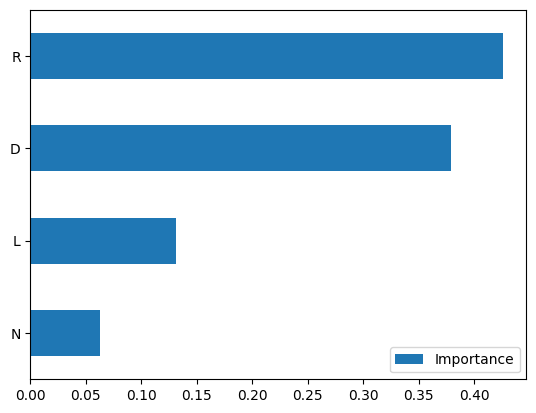

In [ ]:
tree_feature_importances=pd.DataFrame(RFModel.feature_importances_,
                                      index=columns,
                                      columns=['Importance']).sort_values('Importance',
                                                                          ascending=True)
tree_feature_importances.plot.barh()     

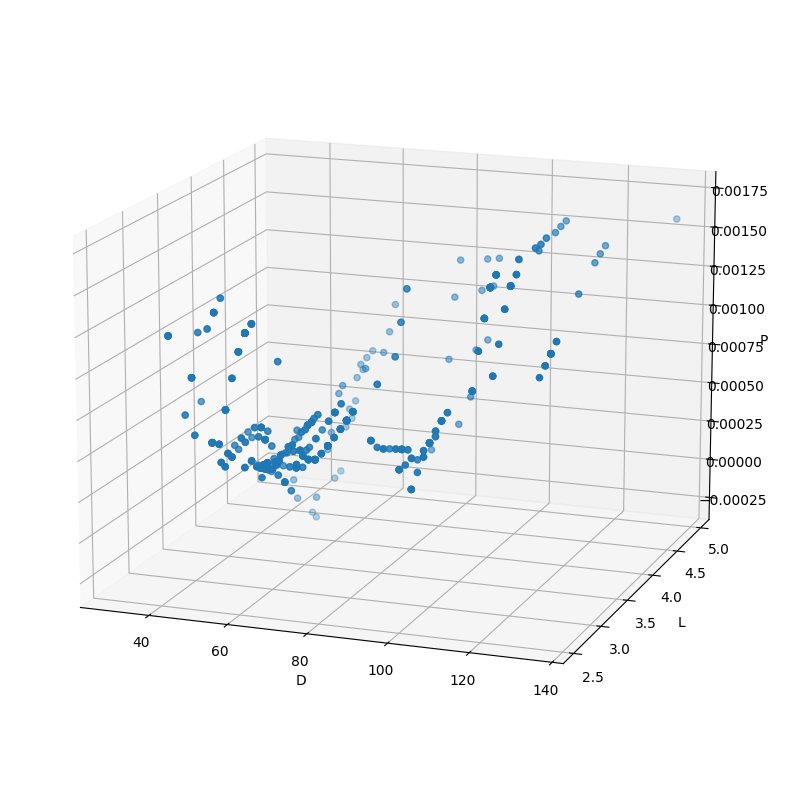

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.interpolate import griddata

# Создаем точки на поверхности
X, Y = np.meshgrid(dfX.iloc[:, 2], dfX.iloc[:, 1])

# Вычисляем значения функции в каждой точке сетки
points = np.array(list(zip(dfX.iloc[:, 2], dfX.iloc[:, 1])))
values = bestADABooster.predict(dfX)
Z = griddata(points, values, (X, Y), method='cubic')

# plot surface
fig = plt.figure(figsize=(24,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z)
ax.set_xlabel('D')
ax.set_ylabel('L')
ax.set_zlabel('P')
ax.view_init(azim=-70, elev=15)
plt.show()

<ipython-input-48-a3ae183dbb38>:12: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://gist.github.com/ev-br/8544371b40f414b7eaf3fe6217209bff`

  interp_func = interp2d(x, y, z, kind='cubic')
/usr/local/lib/python3.9/dist-packages/scipy/interpolate/_fitpack_impl.py:975: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=3,3 nx,ny=10,9 m=25 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
<ipython-input-48-a3ae183dbb3

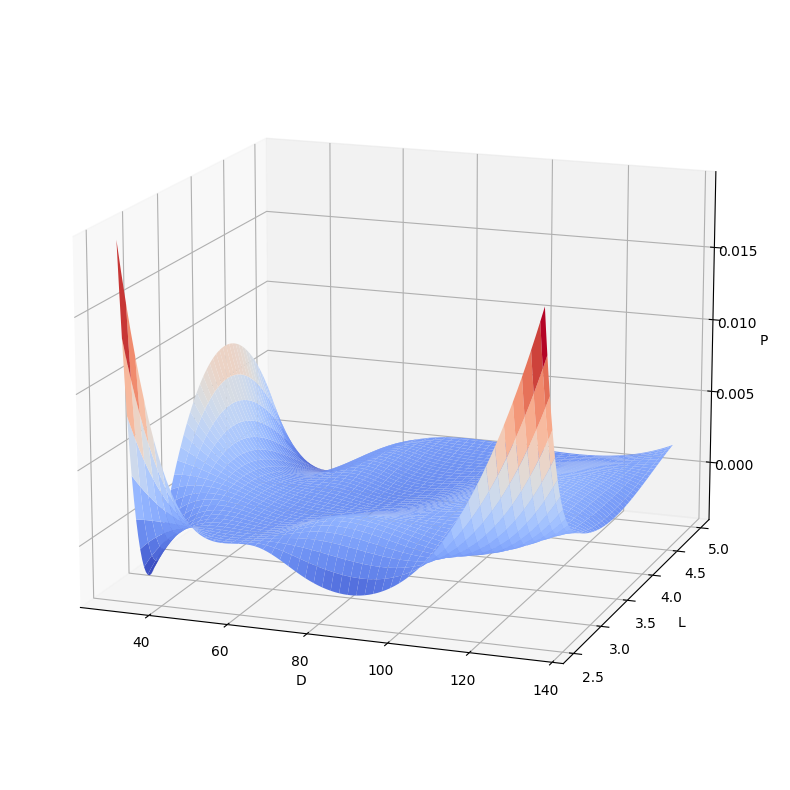

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.interpolate import interp2d

# Создаем точки на поверхности
x = dfX.iloc[:, 2]
y = dfX.iloc[:, 1]
z = bestADABooster.predict(dfX)

# Создаем функцию интерполяции
interp_func = interp2d(x, y, z, kind='cubic')

# Создаем сетку для интерполяции
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
X, Y = np.meshgrid(xi, yi)

# Интерполируем значения функции на сетке
Z = interp_func(xi, yi)

# plot surface
fig = plt.figure(figsize=(24,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='coolwarm')
ax.set_xlabel('D')
ax.set_ylabel('L')
ax.set_zlabel('P')
ax.view_init(azim=-70, elev=15)
plt.show()


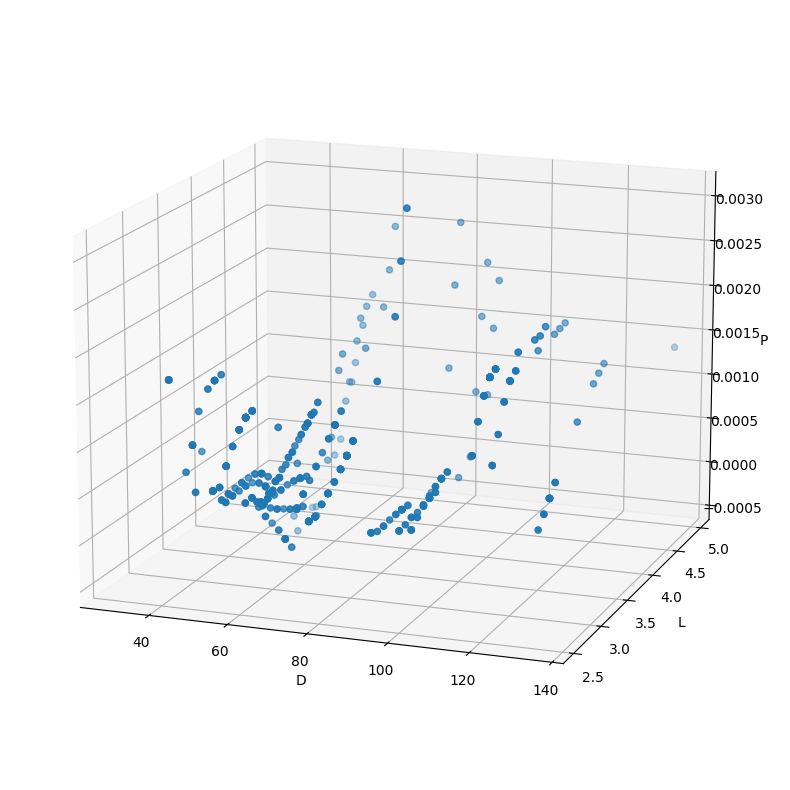

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.interpolate import griddata

# Создаем точки на поверхности
X, Y = np.meshgrid(dfX.iloc[:, 2], dfX.iloc[:, 1])

# Вычисляем значения функции в каждой точке сетки
points = np.array(list(zip(dfX.iloc[:, 2], dfX.iloc[:, 1])))
values = dfY
Z = griddata(points, values, (X, Y), method='cubic')

# plot surface
fig = plt.figure(figsize=(24,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z)
ax.set_xlabel('D')
ax.set_ylabel('L')
ax.set_zlabel('P')
ax.view_init(azim=-70, elev=15)
plt.show()

<ipython-input-46-e5444e824228>:12: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://gist.github.com/ev-br/8544371b40f414b7eaf3fe6217209bff`

  interp_func = interp2d(x, y, z, kind='cubic')
<ipython-input-46-e5444e824228>:20: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
        scattered 2D data.

        In new code, for regular grids use `Reg

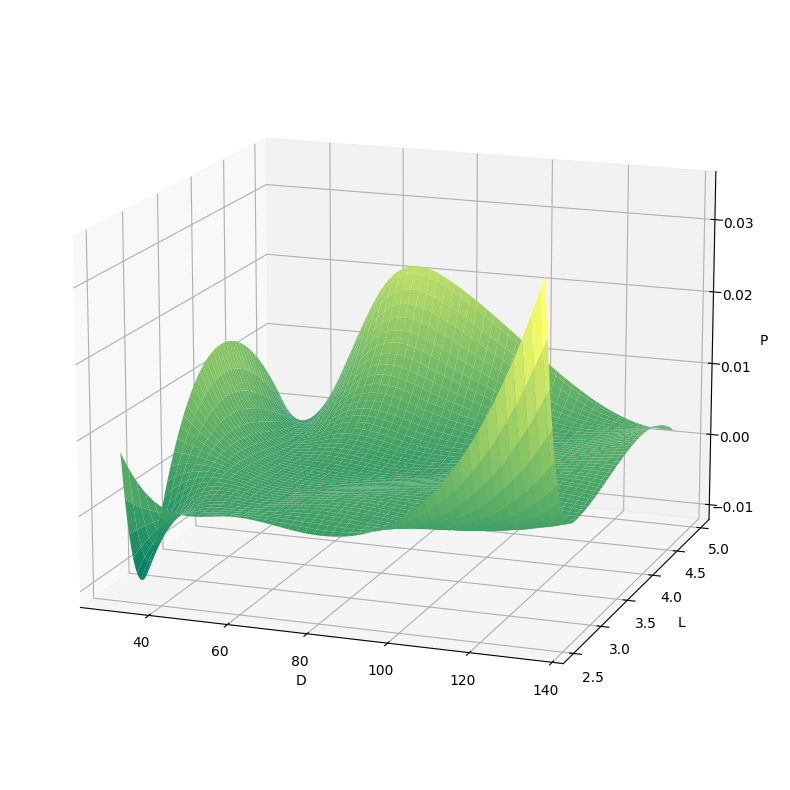

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.interpolate import interp2d

# Создаем точки на поверхности
x = dfX.iloc[:, 2]
y = dfX.iloc[:, 1]
z = dfY

# Создаем функцию интерполяции
interp_func = interp2d(x, y, z, kind='cubic')

# Создаем сетку для интерполяции
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
X, Y = np.meshgrid(xi, yi)

# Интерполируем значения функции на сетке
Z = interp_func(xi, yi)

# plot surface
fig = plt.figure(figsize=(24,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='summer')
ax.set_xlabel('D')
ax.set_ylabel('L')
ax.set_zlabel('P')
ax.view_init(azim=-70, elev=15)
plt.show()

<ipython-input-45-4cc39fdb3174>:13: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://gist.github.com/ev-br/8544371b40f414b7eaf3fe6217209bff`

  interp_func_pred = interp2d(x, y, z_pred, kind='cubic')
/usr/local/lib/python3.9/dist-packages/scipy/interpolate/_fitpack_impl.py:975: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=3,3 nx,ny=10,9 m=25 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
<ipython-input-45-4

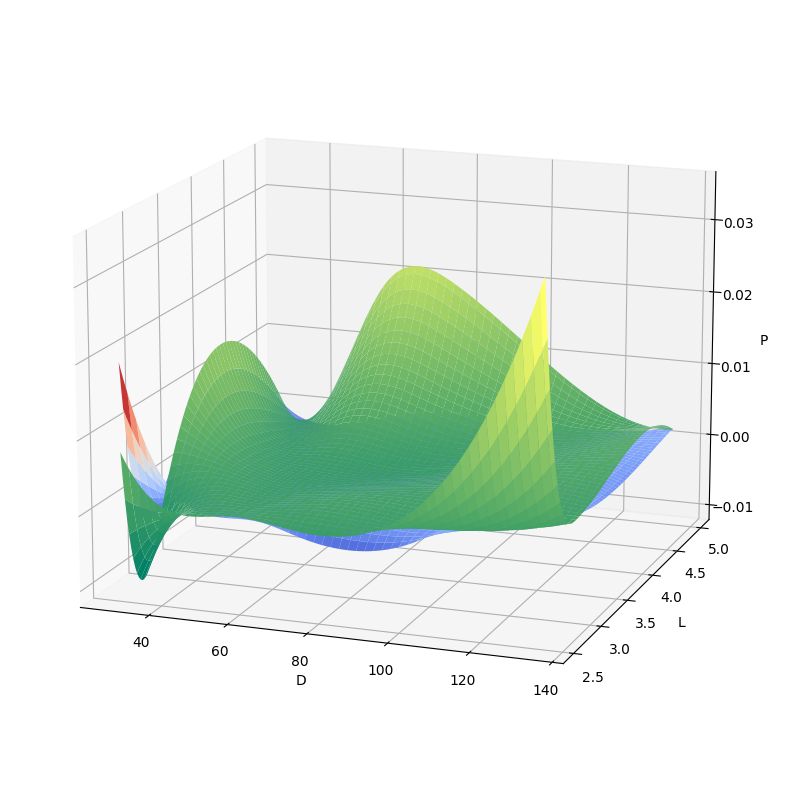

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.interpolate import interp2d

# Создаем точки на поверхности
x = dfX.iloc[:, 2]
y = dfX.iloc[:, 1]
z_pred = bestADABooster.predict(dfX)
z_actual = dfY

# Создаем функции интерполяции
interp_func_pred = interp2d(x, y, z_pred, kind='cubic')
interp_func_actual = interp2d(x, y, z_actual, kind='cubic')

# Создаем сетку для интерполяции
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
X, Y = np.meshgrid(xi, yi)

# Интерполируем значения функции на сетке
Z_pred = interp_func_pred(xi, yi)
Z_actual = interp_func_actual(xi, yi)

# plot surface
fig = plt.figure(figsize=(24,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z_actual, cmap='summer')
ax.plot_surface(X, Y, Z_pred, cmap='coolwarm')
ax.set_xlabel('D')
ax.set_ylabel('L')
ax.set_zlabel('P')
ax.view_init(azim=-70, elev=15)
plt.show()


<ipython-input-44-ea3392a61800>:13: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://gist.github.com/ev-br/8544371b40f414b7eaf3fe6217209bff`

  interp_func_pred = interp2d(x, y, z_pred, kind='cubic')
/usr/local/lib/python3.9/dist-packages/scipy/interpolate/_fitpack_impl.py:975: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=3,3 nx,ny=10,9 m=25 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
<ipython-input-44-e

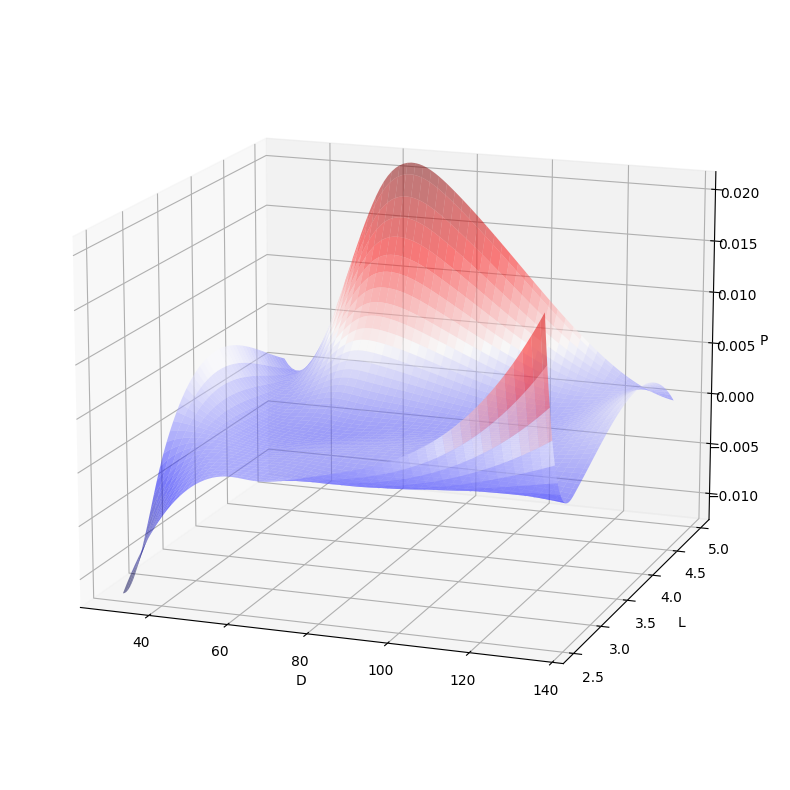

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.interpolate import interp2d

# Создаем точки на поверхности
x = dfX.iloc[:, 2]
y = dfX.iloc[:, 1]
z_pred = bestADABooster.predict(dfX)
z_actual = dfY

# Создаем функции интерполяции
interp_func_pred = interp2d(x, y, z_pred, kind='cubic')
interp_func_actual = interp2d(x, y, z_actual, kind='cubic')

# Создаем сетку для интерполяции
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
X, Y = np.meshgrid(xi, yi)

# Интерполируем значения функции на сетке
Z_pred = interp_func_pred(xi, yi)
Z_actual = interp_func_actual(xi, yi)

# Вычисляем разностную поверхность
Z_diff = Z_actual - Z_pred

# plot surfaces and difference
fig = plt.figure(figsize=(24,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z_diff, cmap='seismic', alpha=0.5)
ax.set_xlabel('D')
ax.set_ylabel('L')
ax.set_zlabel('P')
ax.view_init(azim=-70, elev=15)
plt.show()
